<a href="https://colab.research.google.com/github/ssunwalka01/redeem_coupon/blob/master/Documented_shubham_assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redeeming Coupon Problem

Let's try to dive down into the problem. I will first begin by Data Exploration and then try to find out the relationsip between the tables so as to find a way to merge them.

In [1]:
# importing libraries
import pandas as pd # for data handling
import numpy as np # for mathematical calculations
import seaborn as sns # for data visualisations
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import warnings # to ignore warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- Reading the Data

In [2]:
camp = pd.read_csv("/content/campaign_data.csv")
coupon = pd.read_csv("/content/coupon_item_mapping.csv")
demo = pd.read_csv("/content/customer_demographics.csv")
trans = pd.read_csv("/content/customer_transaction_data.csv")
item = pd.read_csv("/content/item_data.csv")
train = pd.read_csv("/content/train.csv")

Finding the (#rows x #columns) in the dataframes

In [3]:
print("Shape of campaign_data", camp.shape)
print("Shape of coupon item mapping", coupon.shape)
print("Shape of customer demographics", demo.shape)
print("Shape of transaction data", trans.shape)
print("Shape of item data", item.shape)
print("Shape of train data", train.shape)

Shape of campaign_data (28, 4)
Shape of coupon item mapping (92663, 2)
Shape of customer demographics (760, 7)
Shape of transaction data (1324566, 7)
Shape of item data (74066, 4)
Shape of train data (78369, 5)


Here, I am basically trying to find the columns in the dataframes

In [4]:
# getting column names of variables
print("\nColumns of campaign_data\n", camp.columns)
print("---------------------------------------------------------------------------------------------------------------")

print("\nColumns of coupon item mapping\n", coupon.columns)
print("---------------------------------------------------------------------------------------------------------------")

print("\nColumns of customer demographics\n", demo.columns)
print("---------------------------------------------------------------------------------------------------------------")

print("\nColumns of transaction data\n", trans.columns)
print("---------------------------------------------------------------------------------------------------------------")

print("\nColumns of item data\n", item.columns)
print("---------------------------------------------------------------------------------------------------------------")

print("\nColumns of train data\n", train.columns)
print("---------------------------------------------------------------------------------------------------------------")


Columns of campaign_data
 Index(['campaign_id', 'campaign_type', 'start_date', 'end_date'], dtype='object')
---------------------------------------------------------------------------------------------------------------

Columns of coupon item mapping
 Index(['coupon_id', 'item_id'], dtype='object')
---------------------------------------------------------------------------------------------------------------

Columns of customer demographics
 Index(['customer_id', 'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket'],
      dtype='object')
---------------------------------------------------------------------------------------------------------------

Columns of transaction data
 Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount'],
      dtype='object')
---------------------------------------------------------------------------------------------------------------

Columns of item

We have got the column names in the dataframes but we also need to know the data types of the variables present in the datasets.So, getting dtypes...

In [5]:
# getting data types of variables
print("\n Data Types of campaign_data\n", camp.dtypes)
print("---------------------------------------------------------------------------------------------------------------")

print("\n Data Types of coupon item mapping\n", coupon.dtypes)
print("---------------------------------------------------------------------------------------------------------------")

print("\n  Data Types of customer demographics\n", demo.dtypes)
print("---------------------------------------------------------------------------------------------------------------")

print("\n Data Types of transaction data\n", trans.dtypes)
print("---------------------------------------------------------------------------------------------------------------")

print("\n Data Types of item data\n", item.dtypes)
print("---------------------------------------------------------------------------------------------------------------")

print("\n Data Types train data\n", train.dtypes)
print("---------------------------------------------------------------------------------------------------------------")


 Data Types of campaign_data
 campaign_id       int64
campaign_type    object
start_date       object
end_date         object
dtype: object
---------------------------------------------------------------------------------------------------------------

 Data Types of coupon item mapping
 coupon_id    int64
item_id      int64
dtype: object
---------------------------------------------------------------------------------------------------------------

  Data Types of customer demographics
 customer_id        int64
age_range         object
marital_status    object
rented             int64
family_size       object
no_of_children    object
income_bracket     int64
dtype: object
---------------------------------------------------------------------------------------------------------------

 Data Types of transaction data
 date                object
customer_id          int64
item_id              int64
quantity             int64
selling_price      float64
other_discount     float64
coupon_di

Looking at the dataframes...

In [6]:
camp.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [7]:
coupon.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [8]:
demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [9]:
trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [10]:
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [11]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


**UNIVARIATE ANALYSIS**

- **train data**

In [12]:
# TARGET VARIABLE
# redemption_status
train['redemption_status'].value_counts(normalize=True)*100   # percentage wise

0    99.069785
1     0.930215
Name: redemption_status, dtype: float64

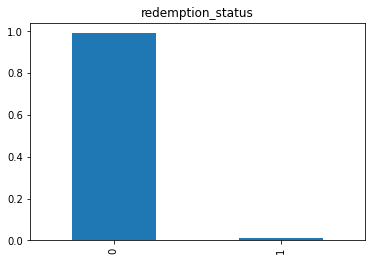

In [13]:
train['redemption_status'].value_counts(normalize=True).plot.bar(title = "redemption_status")

- `Imbalance Data` as '0' has 99% of data as majority class. We will be needing Stratified K fold Cross Validation technique because it handles Imbalance Dataset as it tries to make each sample to be a good representative as a whole.

- **campaign_data**

Y    78.571429
X    21.428571
Name: campaign_type, dtype: float64


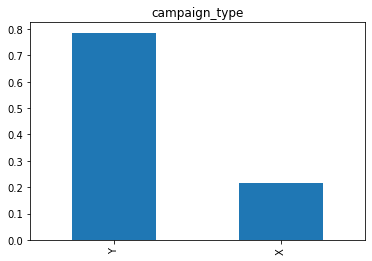

In [14]:
# campaign_type
print(camp['campaign_type'].value_counts(normalize=True)*100)   # percentage wise
camp['campaign_type'].value_counts(normalize=True).plot.bar(title = "campaign_type")

- `campaign_type` has two categories being 'X' and 'Y' in 21% and ~79% proportion respectively.

21/10/13    7.142857
22/04/13    7.142857
16/09/13    7.142857
08/04/13    3.571429
11/03/13    3.571429
29/07/13    3.571429
16/09/12    3.571429
12/12/12    3.571429
16/02/13    3.571429
08/10/13    3.571429
10/08/13    3.571429
12/08/12    3.571429
19/05/13    3.571429
17/12/12    3.571429
02/02/13    3.571429
15/07/13    3.571429
08/10/12    3.571429
12/01/13    3.571429
07/09/13    3.571429
19/11/12    3.571429
07/01/13    3.571429
22/12/12    3.571429
25/08/12    3.571429
28/01/13    3.571429
26/08/13    3.571429
Name: start_date, dtype: float64


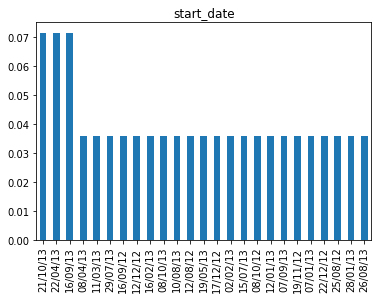

In [15]:
# start_date
print(camp['start_date'].value_counts(normalize=True)*100)   # percentage wise
camp['start_date'].value_counts(normalize=True).plot.bar(title = "start_date")

18/10/13    7.142857
18/01/13    7.142857
30/11/12    3.571429
12/04/13    3.571429
16/08/13    3.571429
16/02/13    3.571429
24/05/13    3.571429
16/11/12    3.571429
01/03/13    3.571429
05/04/13    3.571429
30/08/13    3.571429
04/01/13    3.571429
22/11/13    3.571429
08/03/13    3.571429
27/10/12    3.571429
20/12/13    3.571429
08/02/13    3.571429
15/02/13    3.571429
16/11/13    3.571429
15/11/13    3.571429
21/09/12    3.571429
05/07/13    3.571429
27/09/13    3.571429
07/06/13    3.571429
04/10/13    3.571429
10/05/13    3.571429
Name: end_date, dtype: float64


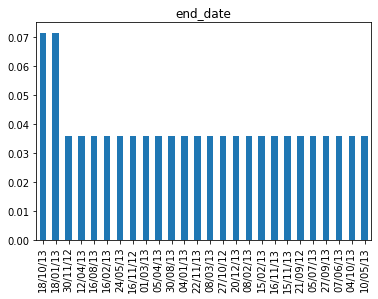

In [16]:
# end_date
print(camp['end_date'].value_counts(normalize=True)*100)   # percentage wise
camp['end_date'].value_counts(normalize=True).plot.bar(title = "end_date")

- **16/09/13, 22/04/13, and 21/10/13** carries largest proportion being the starting data of campaigns and **18/01/13, 18/10/13** carries the largest proportion being the ending date for the campaign.

- I will convert these dates from object into pandas date time format later for feature engineering and manipulations, like day of week, differences between campaigns, etc.

- **customer demographic data**

In [17]:
demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


46-55    35.657895
36-45    24.605263
26-35    17.105263
70+       8.947368
56-70     7.763158
18-25     5.921053
Name: age_range, dtype: float64


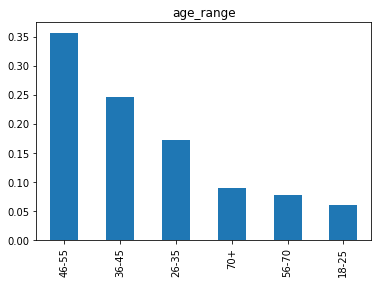

In [18]:
# age_range
print(demo['age_range'].value_counts(normalize=True)*100)   # percentage wise
demo['age_range'].value_counts(normalize=True).plot.bar(title = "age_range")

- There are 6 age ranges bins here, `46-55` being the highest and `18-25` being the lowest.

Married    73.549884
Single     26.450116
Name: marital_status, dtype: float64


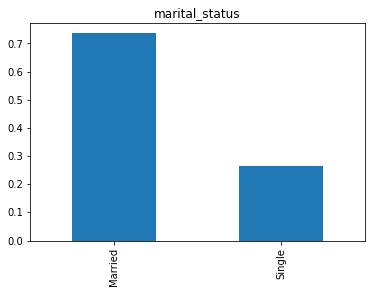

In [19]:
# marital_status
print(demo['marital_status'].value_counts(normalize=True)*100)   # percentage wise
demo['marital_status'].value_counts(normalize=True).plot.bar(title = "marital_status")

- More than 70% of the population is **Married** here.

0    94.605263
1     5.394737
Name: rented, dtype: float64


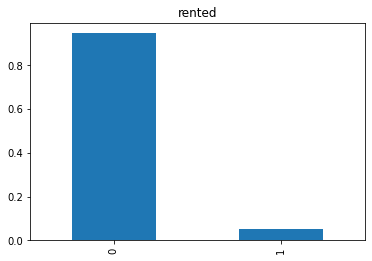

In [20]:
# rented
print(demo['rented'].value_counts(normalize=True)*100)   # percentage wise
demo['rented'].value_counts(normalize=True).plot.bar(title = "rented")

- Only 5.39% of the people live in rented houses, suggests good stability of the people.

5     24.605263
4     21.710526
6     11.578947
3      9.210526
2      8.947368
1      7.763158
8      4.868421
7      4.210526
9      3.815789
12     1.315789
10     1.315789
11     0.657895
Name: income_bracket, dtype: float64


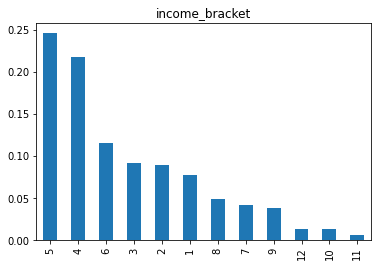

In [21]:
# income_bracket
print(demo['income_bracket'].value_counts(normalize=True)*100)   # percentage wise
demo['income_bracket'].value_counts(normalize=True).plot.bar(title = "income_bracket")

- 12 income brackets are there and majority of people lies in 5th income bracket.

2     39.868421
1     32.631579
3     13.684211
5+     7.500000
4      6.315789
Name: family_size, dtype: float64


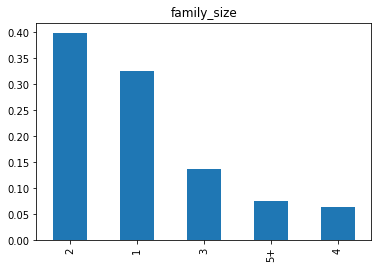

In [22]:
# family_size
print(demo['family_size'].value_counts(normalize=True)*100)   # percentage wise
demo['family_size'].value_counts(normalize=True).plot.bar(title = "family_size")

- 5 categories for family sizes where **2** being the majority.

1     48.198198
3+    27.027027
2     24.774775
Name: no_of_children, dtype: float64


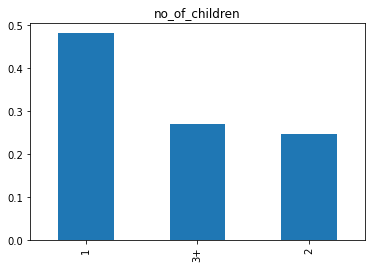

In [23]:
# no_of_children
print(demo['no_of_children'].value_counts(normalize=True)*100)   # percentage wise
demo['no_of_children'].value_counts(normalize=True).plot.bar(title = "no_of_children")

- 3 categories in number of children.

- **customer_transaction_data**

In [24]:
trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [25]:
# # trans
# print(trans['date'].value_counts(normalize=True)*100)   # percentage wise
# trans['date'].value_counts(normalize=True).plot.bar(title = "date")

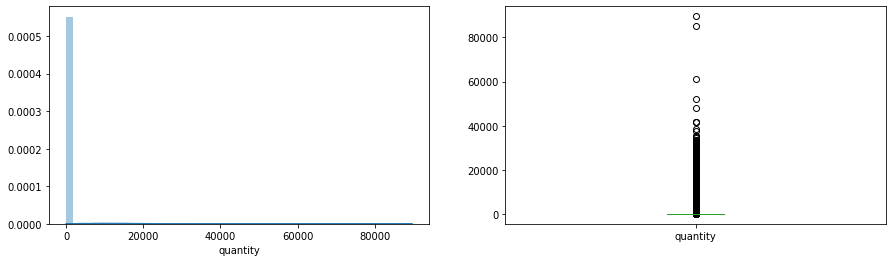

In [26]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(trans['quantity']);
plt.subplot(122)
trans['quantity'].plot.box(figsize=(15,4)) 
plt.show()

- Unimodal

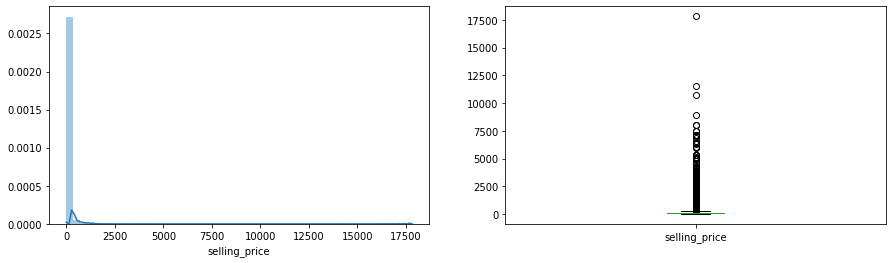

In [27]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(trans['selling_price']);
plt.subplot(122)
trans['selling_price'].plot.box(figsize=(15,4)) 
plt.show()

- Again, Unimodal data

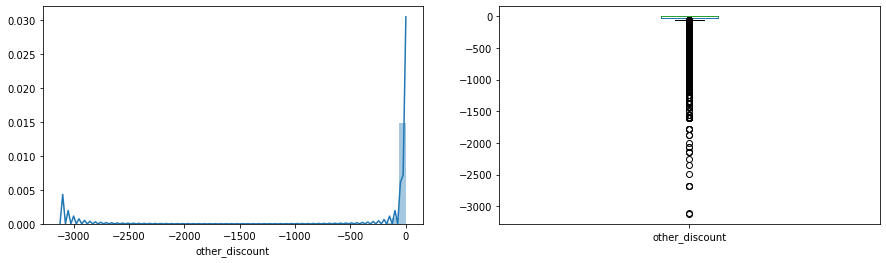

In [28]:
# other_discount
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(trans['other_discount']);
plt.subplot(122)
trans['other_discount'].plot.box(figsize=(15,4)) 
plt.show()

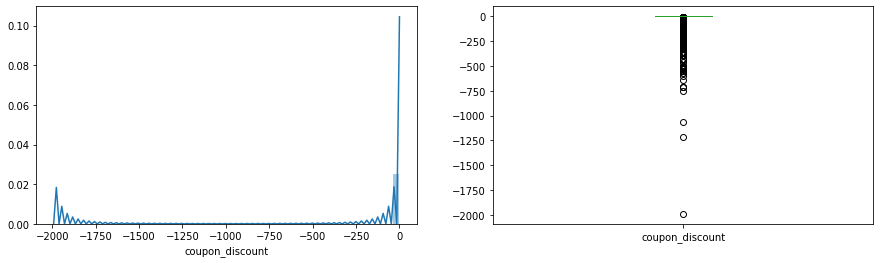

In [29]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(trans['coupon_discount']);
plt.subplot(122)
trans['coupon_discount'].plot.box(figsize=(15,4)) 
plt.show()

- **item_data**

In [30]:
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


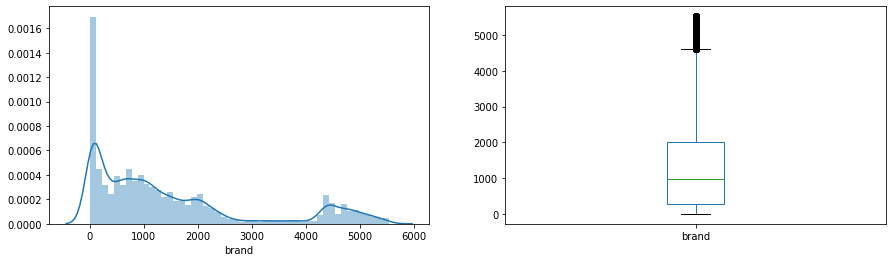

In [31]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(item['brand']);
plt.subplot(122)
item['brand'].plot.box(figsize=(15,4)) 
plt.show()

In [32]:
item['brand'].nunique()

5528

- Though 'brand' is an int64 dtype but, I will use it as a categorical variable denoting the Brand Names like `Cadbury`, `CocoCola`, etc. being 5528 different brands in total.

Established    84.845948
Local          15.154052
Name: brand_type, dtype: float64


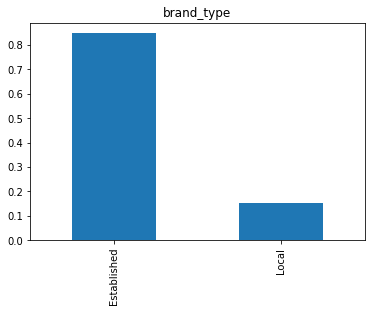

In [33]:
# brand_type
print(item['brand_type'].value_counts(normalize=True)*100)   # percentage wise
item['brand_type'].value_counts(normalize=True).plot.bar(title = "brand_type")

- **brand_type** being 84% Established brands in the items store. More Established brands are there as compared to Local brands.

Grocery                   43.809575
Pharmaceutical            33.039451
Natural Products           3.419923
Dairy, Juices & Snacks     3.274107
Skin & Hair Care           3.029730
Meat                       2.808306
Packaged Meat              2.654389
Prepared Food              2.538277
Bakery                     2.266897
Seafood                    0.982907
Flowers & Plants           0.896498
Miscellaneous              0.519807
Alcohol                    0.409095
Garden                     0.137715
Restauarant                0.105311
Salads                     0.054006
Travel                     0.025653
Fuel                       0.018902
Vegetables (cut)           0.009451
Name: category, dtype: float64


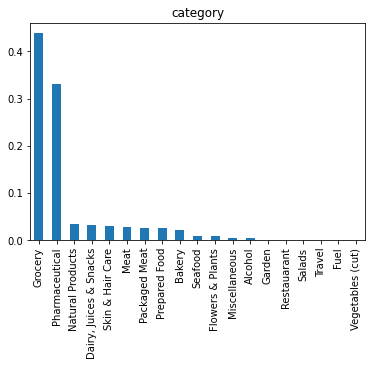

In [34]:
# category
print(item['category'].value_counts(normalize=True)*100)   # percentage wise
item['category'].value_counts(normalize=True).plot.bar(title = "category")

In [35]:
item['category'].nunique()

19

- There are **19** unique categories for items in the store and `Grocery`, `Pharmaceutical` are present in the largest proportion.

**BIVARIATE ANALYSIS**

<Figure size 720x720 with 0 Axes>

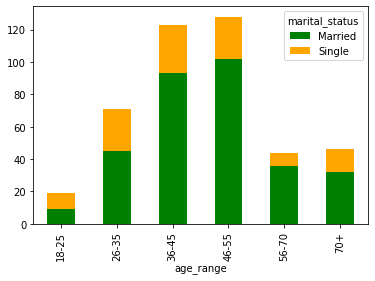

In [36]:
plt.figure(figsize=(10,10))
df = pd.crosstab(demo['age_range'],demo['marital_status'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

- Across all age ranges, Married people are present in the majority.

<Figure size 720x720 with 0 Axes>

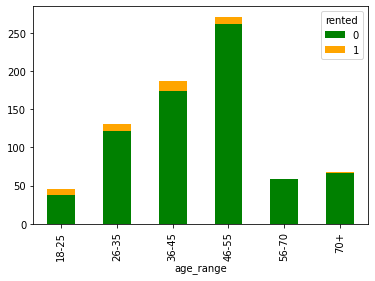

In [37]:
plt.figure(figsize=(10,10))
df = pd.crosstab(demo['age_range'],demo['rented'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

- Across all age ranges, people live in their own houses.

<Figure size 720x720 with 0 Axes>

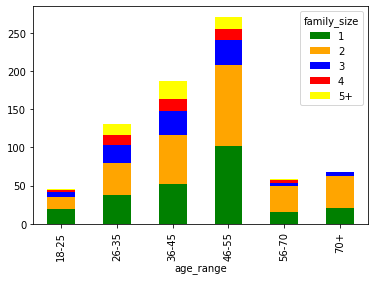

In [38]:
plt.figure(figsize=(10,10))
df = pd.crosstab(demo['age_range'],demo['family_size'])
df.plot(kind='bar', stacked= True ,color =['green','orange', 'blue', 'red', 'yellow'],grid=False)

- Family size of `2` is majorly present.

<Figure size 720x720 with 0 Axes>

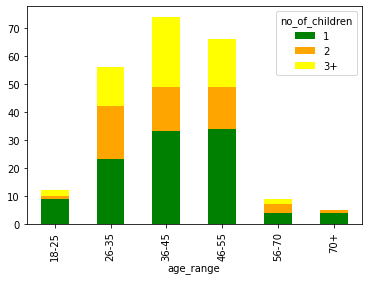

In [39]:
plt.figure(figsize=(10,10))
df = pd.crosstab(demo['age_range'],demo['no_of_children'])
df.plot(kind='bar', stacked= True ,color =['green','orange', 'yellow'],grid=False)

- maximum people have `1` child, followed by `3+`, majorly.

<Figure size 720x720 with 0 Axes>

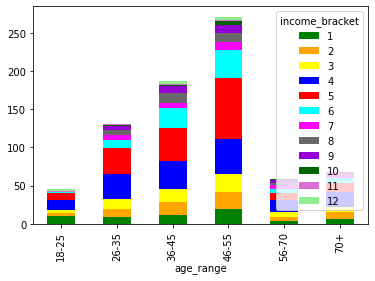

In [40]:
# income_bracket
plt.figure(figsize=(10,10))
df = pd.crosstab(demo['age_range'],demo['income_bracket'])
df.plot(kind='bar', stacked= True ,color =['green','orange', 'yellow','blue', 'red', 'cyan', 'magenta', 'dimgrey', 'darkviolet', 'darkgreen', 'orchid', 'lightgreen'],grid=False)

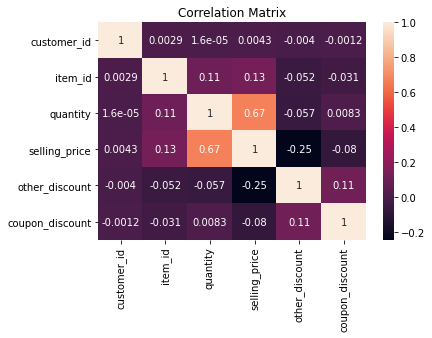

In [41]:
plt.title('Correlation Matrix')
sns.heatmap(trans.corr(),annot=True)

- high correlation between selling price and quantity.

**FINDING DUPLICATED ROWS BASED ON ALL COLUMNS**

In [42]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF_camp = camp[camp.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF_camp)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [campaign_id, campaign_type, start_date, end_date]
Index: []


In [43]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF_coupon = coupon[coupon.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF_coupon)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [coupon_id, item_id]
Index: []


In [44]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF_demo = demo[demo.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF_demo)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [customer_id, age_range, marital_status, rented, family_size, no_of_children, income_bracket]
Index: []


In [45]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF_trans = trans[trans.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF_trans)

Duplicate Rows except first occurrence based on all columns are :
               date  customer_id  ...  other_discount  coupon_discount
5465     2012-01-19          801  ...         -159.22             0.00
5497     2012-01-19          814  ...            0.00             0.00
5502     2012-01-19          814  ...            0.00             0.00
5514     2012-01-19          433  ...          -17.45             0.00
6038     2012-01-20         1140  ...            0.00             0.00
...             ...          ...  ...             ...              ...
1322168  2013-07-02         1085  ...          -56.64             0.00
1322865  2013-07-03          627  ...            0.00           -17.81
1323178  2013-07-03         1485  ...          -35.62           -71.24
1323391  2013-07-03         1558  ...          -20.66           -71.24
1323413  2013-07-03          998  ...            0.00           -17.81

[2916 rows x 7 columns]


There are Duplicate rows in Transaction Table

In [46]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF_train = train[train.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF_train)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [id, campaign_id, coupon_id, customer_id, redemption_status]
Index: []


In [47]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF_item = item[item.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF_item)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [item_id, brand, brand_type, category]
Index: []


**Checking Missing Values in Data Frames**

In [48]:
# checking missing data percentage in data
def misssing_values(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  return missing_Data

In [49]:
campaign_data_missing = misssing_values(camp)
print("Missing values in Campaign Data\n")
campaign_data_missing.head()

Missing values in Campaign Data



,Total,Percent
end_date,0,0.0
start_date,0,0.0
campaign_type,0,0.0
campaign_id,0,0.0


In [50]:
coupon_item_missing = misssing_values(coupon)
print("Missing values in Coupon Item Mapping Data\n")
coupon_item_missing.head()

Missing values in Coupon Item Mapping Data



,Total,Percent
item_id,0,0.0
coupon_id,0,0.0


In [51]:
customer_demographics_missing = misssing_values(demo)
print("Missing values in Customer Demographics Data\n")
customer_demographics_missing.head()

Missing values in Customer Demographics Data



,Total,Percent
no_of_children,538,70.789474
marital_status,329,43.289474
income_bracket,0,0.000000
family_size,0,0.000000
rented,0,0.000000


In [52]:
customer_transaction_missing = misssing_values(trans)
print("Missing values in Customer Transaction Data\n")
customer_transaction_missing.head()

Missing values in Customer Transaction Data



,Total,Percent
coupon_discount,0,0.0
other_discount,0,0.0
selling_price,0,0.0
quantity,0,0.0
item_id,0,0.0


In [53]:
item_data_missing = misssing_values(item)
print("Missing values in Item Data\n")
item_data_missing.head()

Missing values in Item Data



,Total,Percent
category,0,0.0
brand_type,0,0.0
brand,0,0.0
item_id,0,0.0


In [54]:
train_data_missing = misssing_values(train)
print("Missing values in train data\n")
train_data_missing.head()

Missing values in train data



,Total,Percent
redemption_status,0,0.0
customer_id,0,0.0
coupon_id,0,0.0
campaign_id,0,0.0
id,0,0.0


- **Customer Demographics Data** has missing values.

In [55]:
train_campaign  = train['campaign_id'].unique()
print("\n\n Campaign id's which are present in train data and campaign data : \n")
print(camp[camp['campaign_id'].isin(train_campaign)])
print("---------------------------------------------------------------------------------------------------------------")

print("\n Unique no of values in Train Campaign_id\n", train['campaign_id'].nunique())
print("\n Uniques list\n", train['campaign_id'].unique())
print("---------------------------------------------------------------------------------------------------------------")

print("\n Unique no of values in Campaign Data Campaign_id \n", camp['campaign_id'].nunique())
print("\n Uniques list\n", camp['campaign_id'].unique())
print("---------------------------------------------------------------------------------------------------------------")



 Campaign id's which are present in train data and campaign data : 

    campaign_id campaign_type start_date  end_date
10           13             X   19/05/13  05/07/13
11           11             Y   22/04/13  07/06/13
12           12             Y   22/04/13  24/05/13
13           10             Y   08/04/13  10/05/13
14            9             Y   11/03/13  12/04/13
15            8             X   16/02/13  05/04/13
16            7             Y   02/02/13  08/03/13
17            6             Y   28/01/13  01/03/13
18            3             Y   22/12/12  16/02/13
19            5             Y   12/01/13  15/02/13
20            4             Y   07/01/13  08/02/13
21            1             Y   12/12/12  18/01/13
22            2             Y   17/12/12  18/01/13
23           30             X   19/11/12  04/01/13
24           29             Y   08/10/12  30/11/12
25           28             Y   16/09/12  16/11/12
26           27             Y   25/08/12  27/10/12
27         

**Let's Look at the Unique ID's in the Data**

In [56]:
print("---------------------------------------------------------------------------------------------------------------")
print("\n Number of Unique Train campaign_id Values Are : \n", train["campaign_id"].nunique())

print("\n Number of Unique Campaign Data campaign_id Values Are : \n", camp["campaign_id"].nunique())
print("---------------------------------------------------------------------------------------------------------------")

print("\n Number of Unique Train coupon_id Values Are : \n", train["coupon_id"].nunique())
print("\n Number of Unique Coupon Item Mapping coupon_id Values Are : \n", coupon["coupon_id"].nunique())
print("---------------------------------------------------------------------------------------------------------------")

print("\n Number of Unique Train customer_id Values Are : \n", train["customer_id"].nunique())
print("\n Number of Unique Customer Demographics customer_id Values Are : \n", demo["customer_id"].nunique())
print("\n Number of Unique Transaction Data customer_id Values Are : \n", trans["customer_id"].nunique())

print("---------------------------------------------------------------------------------------------------------------")

print("\n Number of Unique Coupon Item Mapping item_id Values Are : \n", coupon["item_id"].nunique())
print("\n Number of Unique Transaction Data item_id Values Are : \n", trans["item_id"].nunique())
print("\n Number of Unique Item Data item_id Values Are : \n", item["item_id"].nunique())

print("---------------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------------

 Number of Unique Train campaign_id Values Are : 
 18

 Number of Unique Campaign Data campaign_id Values Are : 
 28
---------------------------------------------------------------------------------------------------------------

 Number of Unique Train coupon_id Values Are : 
 866

 Number of Unique Coupon Item Mapping coupon_id Values Are : 
 1116
---------------------------------------------------------------------------------------------------------------

 Number of Unique Train customer_id Values Are : 
 1428

 Number of Unique Customer Demographics customer_id Values Are : 
 760

 Number of Unique Transaction Data customer_id Values Are : 
 1582
---------------------------------------------------------------------------------------------------------------

 Number of Unique Coupon Item Mapping item_id Values Are : 
 36289

 Number of Unique Transaction Data item_id Va

**DATA PREPROCESSING**

In [57]:
# # Dropping Duplicate rows in dataframes before merging
# print("Before Dropping\n",train.shape)
# train = train.drop('id',axis=1)
# train = train.drop_duplicates()
# print("After Dropping\n", train.shape)

In [58]:
# Dropping Duplicate rows in dataframes before merging
print("Before Dropping\n",trans.shape)
trans = trans.drop_duplicates()
print("After Dropping\n", trans.shape)

Before Dropping
 (1324566, 7)
After Dropping
 (1321650, 7)


In [59]:
# !pip3 freeze > requirements.txt

- Campaign_data Feature Creations

We will be converting dates into pandas datetime format from categorical format for further feature engineering

In [60]:
camp['start_date']=pd.to_datetime(camp['start_date'],format='%d/%m/%y',dayfirst=True)
camp['end_date']=pd.to_datetime(camp['end_date'],format='%d/%m/%y',dayfirst=True)

- Creating NEW Features here....

In [61]:
# Duration of Campaigns
camp['Camp_Duration_by_days']=(camp['end_date']-camp['start_date'])/np.timedelta64(1,'D')
camp['Camp_Duration_by_month']=(camp['end_date']-camp['start_date'])/np.timedelta64(1,'M')
camp['Camp_Duration_by_week']=(camp['end_date']-camp['start_date'])/np.timedelta64(1,'W')

In [62]:
camp.head()

,campaign_id,campaign_type,start_date,end_date,Camp_Duration_by_days,Camp_Duration_by_month,Camp_Duration_by_week
0,24,Y,2013-10-21,2013-12-20,60.0,1.971293,8.571429
1,25,Y,2013-10-21,2013-11-22,32.0,1.051356,4.571429
2,20,Y,2013-09-07,2013-11-16,70.0,2.299842,10.000000
3,23,Y,2013-10-08,2013-11-15,38.0,1.248486,5.428571
4,21,Y,2013-09-16,2013-10-18,32.0,1.051356,4.571429


In [63]:
camp.dtypes

campaign_id                        int64
campaign_type                     object
start_date                datetime64[ns]
end_date                  datetime64[ns]
Camp_Duration_by_days            float64
Camp_Duration_by_month           float64
Camp_Duration_by_week            float64
dtype: object

**Merging Process**

There are different types of table relationships possible betweek the Entity Relationship Diagram:

| Relationship      |Description  |
|----------------------|-------------------------------|
|`one-to-one`        |Both tables can have only one record on either side of the relationship. Each primary key value relates to only one (or no) record in the related table 
|`one-to-many`        |The parent table (or primary key table) contains only one record that relates to none, one, or many records in the child table 
|`many-to-many`        |Each record in both tables can relate to any number of records (or no records) in the other table.

The following depicts the type of table relationships.

**one-to-many relationship tables**

| Tables|  Key
|----------------------|-------------------------------|
|`train` and `campaign_data`        |campaign_id
|`train` and `customer_demographics`         |customer_id
|`item_data`  and `customer_transaction_data`         |item_id
|`customer_demographics` and `customer_transaction_data`       |customer_id


**many-to-many relationship tables**


| Tables|  Key
|----------------------|-------------------------------|
|`train` and `customer_transaction_data`          | customer_id |
|`coupon_item_mapping` and `item_data`        | item_id |
|`coupon_item_mapping`  and `customer_transaction_data`         |item_id  |


**Multi level relationship**

There are also following relationships which goes upto 2 levels.

 - `train`   ->`coupon_item_mapping` on coupon_id and `coupon_item_mapping` ->`customer_transaction_data` on item_id
 - `train` ->`coupon_item_mapping` on coupon_id and `coupon_item_mapping` ->`item_data` on item_id

Hence from the above multi-level relationship, it can be seen that there is an indirect `many-to-many` relationship between `train` and `item_data` tables.

**Merging techniques**

Separate merging process will be applied for one-to-many and many-to-one relationships. 
- For `one-to-many`, simple merge of both tables will provide combined features and 
- for `many-to-many`, aggregation of columns such as mean, min, max, std, quanrtile, etc need to be performed on the table that will be joined followed by a groupby priorly.


**Merging Process**

- Simple merge of `train` table with `campaign_data` is performed.
- Simple merge of `coupon_item_mapping` table with `item_data` is performed.
- Simple merge of `customer_transaction_data` table with `coupon_item_mapping` is performed.

- Then Aggregation of `customer_transaction_data` is generated from `customer_transaction_data` itself precided by a **groupby** operation on `customer_id`, and `date` stating the customer's transactions on specified dates.eg `X` Customer on `Y` date has this Transaction Data aggregated.

- Merge of `Train` and aggregated `customer_transaction_data` is performed where new features are being added using mode, mean, etc measures for categorical and continuous variables .

- Though, as of now, `Customer_demographics_Data` is not included but given the time, I can try by merging it also.

In [64]:
train = train.merge(camp, on = "campaign_id", how = "left")
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,Camp_Duration_by_days,Camp_Duration_by_month,Camp_Duration_by_week
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143


In [65]:
print("After Merging Size\n", train.shape)

After Merging Size
 (78369, 11)


MERGE 2

In [66]:
# merge of coupon_item_mapping and item_data
for i in ['brand', 'brand_type', 'category']:
    item[i]=item[i].astype('category')
    
coupon = coupon.merge(item,on='item_id',how='left')
coupon.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [67]:
coupon.dtypes

coupon_id        int64
item_id          int64
brand         category
brand_type    category
category      category
dtype: object

CUSTOMER TRANSACTION DATA

- Creating NEW Features...

In [68]:
trans['date']=pd.to_datetime(trans['date'],format='%Y-%m-%d')
trans['day_no']=trans['date'].dt.day.astype('category')
trans['month_no']=trans['date'].dt.month.astype('category')
trans['week_no']=trans['date'].dt.week.astype('category')

In [69]:
trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day_no,month_no,week_no
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,2,1,1
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,2,1,1
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,2,1,1


Creating new features from Transaction Data

In [70]:
# coupon_discount is an important feature through which Data Leakage can occur
trans['discount_column']=trans['coupon_discount'].apply(lambda x: 0 if x>=0 else 1)
trans['new_price_marked']=trans['selling_price']-trans['other_discount']-trans['coupon_discount']
trans['discount_percent']=(trans['new_price_marked']-trans['selling_price'])/trans['selling_price']
trans['price_per_quantity']=trans['new_price_marked']/trans['quantity']
trans['Sale_price_marked']=trans['new_price_marked']/trans['selling_price']

In [71]:
trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day_no,month_no,week_no,discount_column,new_price_marked,discount_percent,price_per_quantity,Sale_price_marked
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,2,1,1,0,120.75,0.133803,120.75,1.133803
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,2,1,1,0,67.32,0.000000,67.32,1.000000
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,2,1,1,0,99.38,0.395003,99.38,1.395003


In [72]:
trans = trans.merge(coupon,on='item_id',how='left')
trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day_no,month_no,week_no,discount_column,new_price_marked,discount_percent,price_per_quantity,Sale_price_marked,coupon_id,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,7.0,56,Local,Natural Products
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,20.0,56,Local,Natural Products
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,29.0,56,Local,Natural Products
3,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,7.0,56,Local,Natural Products
4,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,20.0,56,Local,Natural Products


In [73]:
trans.dtypes

date                  datetime64[ns]
customer_id                    int64
item_id                        int64
quantity                       int64
selling_price                float64
other_discount               float64
coupon_discount              float64
day_no                      category
month_no                    category
week_no                     category
discount_column                int64
new_price_marked             float64
discount_percent             float64
price_per_quantity           float64
Sale_price_marked            float64
coupon_id                    float64
brand                       category
brand_type                  category
category                    category
dtype: object

In [74]:
trans=trans.merge(trans.groupby(['customer_id','date']).agg({'coupon_id':'count','item_id':'count','discount_percent':sum}).reset_index().rename(columns={'coupon_id':'coupon_acquired','item_id':'item_bought','discount_percent':'total_discount'}),on=['customer_id','date'],how='left')

In [75]:
trans['coupon_to_item_redeemed']=trans['item_bought']-trans['coupon_acquired']

In [76]:
trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day_no,month_no,week_no,discount_column,new_price_marked,discount_percent,price_per_quantity,Sale_price_marked,coupon_id,brand,brand_type,category,coupon_acquired,item_bought,total_discount,coupon_to_item_redeemed
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,7.0,56,Local,Natural Products,11,12,3.403242,1
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,20.0,56,Local,Natural Products,11,12,3.403242,1
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,29.0,56,Local,Natural Products,11,12,3.403242,1
3,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,7.0,56,Local,Natural Products,11,12,3.403242,1
4,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,20.0,56,Local,Natural Products,11,12,3.403242,1


In [77]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,Camp_Duration_by_days,Camp_Duration_by_month,Camp_Duration_by_week
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143


Aggregation on transaction data

In [78]:
df_agg=train.merge(trans.groupby(['customer_id','coupon_id']).agg({'date':set,'discount_column':sum,'quantity':sum,'item_id':'count',
                                                            'coupon_acquired':sum,'item_bought':'mean','total_discount':sum}).reset_index(),on=['customer_id','coupon_id'],how='left')
df_agg.sample(10)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,Camp_Duration_by_days,Camp_Duration_by_month,Camp_Duration_by_week,date,discount_column,quantity,item_id,coupon_acquired,item_bought,total_discount
40359,66283,7,1102,1065,0,Y,2013-02-02,2013-03-08,34.0,1.117066,4.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43285,70975,29,868,182,0,Y,2012-10-08,2012-11-30,53.0,1.741309,7.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46461,76169,13,1100,242,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31240,51190,29,975,117,0,Y,2012-10-08,2012-11-30,53.0,1.741309,7.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63661,104566,8,65,1270,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33447,54831,8,744,1238,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54343,89277,13,681,769,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44785,73457,8,97,532,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12682,20926,29,619,278,0,Y,2012-10-08,2012-11-30,53.0,1.741309,7.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55483,91213,13,1031,411,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df_agg_missing = misssing_values(df_agg)
df_agg_missing.head()

,Total,Percent
total_discount,64489,82.288915
coupon_acquired,64489,82.288915
item_id,64489,82.288915
quantity,64489,82.288915
discount_column,64489,82.288915


In [80]:
#  mode
# df_agg['coupon_acquired'].mode()
df_agg['coupon_acquired'].fillna(0)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
78364      0.0
78365      0.0
78366    138.0
78367      0.0
78368     23.0
Name: coupon_acquired, Length: 78369, dtype: float64

In [81]:
print(df_agg.shape)
df_agg['date'].replace(np.nan,0,inplace=True)
df_agg['discount_column'].replace(np.nan,-1,inplace=True)

train['within_date']=df_agg['date'].apply(lambda x: len(x) if x !=0 else 0)
# if any transaction is there

(78369, 18)


In [82]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,Camp_Duration_by_days,Camp_Duration_by_month,Camp_Duration_by_week,within_date
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429,0
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,0


In [83]:
df_agg.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,Camp_Duration_by_days,Camp_Duration_by_month,Camp_Duration_by_week,date,discount_column,quantity,item_id,coupon_acquired,item_bought,total_discount
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,-1.0,NaN,NaN,NaN,NaN,NaN
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,-1.0,NaN,NaN,NaN,NaN,NaN
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429,0,-1.0,NaN,NaN,NaN,NaN,NaN
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,-1.0,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,0,-1.0,NaN,NaN,NaN,NaN,NaN


- Now, I will aggregate the data and will add new features such as max, mi, sum, std, etc followed by aggregation

In [84]:
c=['count','nunique']
n=['mean','max','min','sum','std']
nn=['mean','max','min','sum','std','quantile']
agg_c={'day_no':c,'month_no':c,'week_no':c,'quantity':n,'selling_price':n,'other_discount':n,'coupon_discount':n,'item_id':c,'brand':c,
       'category':c,'coupon_id':c,'discount_column':nn,'new_price_marked':n,'discount_percent':n,'price_per_quantity':n,'brand_type':c,'Sale_price_marked':n,
       'coupon_acquired':nn, 'item_bought':nn, 'total_discount':n, 'coupon_to_item_redeemed':nn}
trans=trans.groupby(['customer_id']).agg(agg_c)
trans.head()

day_no         month_no          ... coupon_to_item_redeemed                          
             count nunique    count nunique  ...                     min    sum       std quantile
customer_id                                  ...                                                  
1             2206      28     2206      12  ...                       0  29287  5.671542     14.0
2              823      19      823      11  ...                       0   6431  6.097201      6.0
3             1351      23     1351      12  ...                       0  18860  9.525554     12.0
4              451      23      451      11  ...                       0   2875  4.604267      4.0
5             1594      31     1594      12  ...                       0   3944  2.351349      2.0

[5 rows x 85 columns]

In [85]:
# Expanding the columns
trans.columns=['Transaction_' + '_'.join(col).strip() for col in trans.columns.values]
trans.reset_index(inplace=True)
trans.head()

,customer_id,Transaction_day_no_count,Transaction_day_no_nunique,Transaction_month_no_count,Transaction_month_no_nunique,Transaction_week_no_count,Transaction_week_no_nunique,Transaction_quantity_mean,Transaction_quantity_max,Transaction_quantity_min,Transaction_quantity_sum,Transaction_quantity_std,Transaction_selling_price_mean,Transaction_selling_price_max,Transaction_selling_price_min,Transaction_selling_price_sum,Transaction_selling_price_std,Transaction_other_discount_mean,Transaction_other_discount_max,Transaction_other_discount_min,Transaction_other_discount_sum,Transaction_other_discount_std,Transaction_coupon_discount_mean,Transaction_coupon_discount_max,Transaction_coupon_discount_min,Transaction_coupon_discount_sum,Transaction_coupon_discount_std,Transaction_item_id_count,Transaction_item_id_nunique,Transaction_brand_count,Transaction_brand_nunique,Transaction_category_count,Transaction_category_nunique,Transaction_coupon_id_count,Transaction_coupon_id_nunique,Transaction_discount_column_mean,Transaction_discount_column_max,Transaction_discount_column_min,Transaction_discount_column_sum,Transaction_discount_column_std,...,Transaction_discount_percent_mean,Transaction_discount_percent_max,Transaction_discount_percent_min,Transaction_discount_percent_sum,Transaction_discount_percent_std,Transaction_price_per_quantity_mean,Transaction_price_per_quantity_max,Transaction_price_per_quantity_min,Transaction_price_per_quantity_sum,Transaction_price_per_quantity_std,Transaction_brand_type_count,Transaction_brand_type_nunique,Transaction_Sale_price_marked_mean,Transaction_Sale_price_marked_max,Transaction_Sale_price_marked_min,Transaction_Sale_price_marked_sum,Transaction_Sale_price_marked_std,Transaction_coupon_acquired_mean,Transaction_coupon_acquired_max,Transaction_coupon_acquired_min,Transaction_coupon_acquired_sum,Transaction_coupon_acquired_std,Transaction_coupon_acquired_quantile,Transaction_item_bought_mean,Transaction_item_bought_max,Transaction_item_bought_min,Transaction_item_bought_sum,Transaction_item_bought_std,Transaction_item_bought_quantile,Transaction_total_discount_mean,Transaction_total_discount_max,Transaction_total_discount_min,Transaction_total_discount_sum,Transaction_total_discount_std,Transaction_coupon_to_item_redeemed_mean,Transaction_coupon_to_item_redeemed_max,Transaction_coupon_to_item_redeemed_min,Transaction_coupon_to_item_redeemed_sum,Transaction_coupon_to_item_redeemed_std,Transaction_coupon_to_item_redeemed_quantile
0,1,2206,28,2206,12,2206,38,1.133726,5,1,2501,0.454532,94.922085,445.25,12.11,209398.12,53.310302,-20.228314,0.0,-372.23,-44623.66,36.111393,-1.864565,0.0,-106.86,-4113.23,8.521853,2206,463,1665,76,1665,6,1665,159,0.071623,1,0,158,0.257921,...,0.238737,1.792027,0.0,526.654601,0.286794,104.370662,494.76,12.110000,230241.681167,51.360053,1665,2,1.238737,2.792027,1.0,2732.654601,0.286794,42.207162,74,0,93109,16.721411,42.0,55.483228,93,1,122396,21.104973,57.0,13.392748,30.803886,0.0,29544.403002,6.798600,13.276065,23,0,29287,5.671542,14.0
1,2,823,19,823,11,823,27,1.117861,5,1,920,0.417919,103.368943,640.80,14.25,85072.64,71.076889,-16.798141,0.0,-312.03,-13824.87,33.011891,-0.302965,0.0,-89.05,-249.34,4.721158,823,352,672,103,672,8,672,137,0.004860,1,0,4,0.069588,...,0.190837,2.190062,0.0,157.058578,0.317185,109.641409,640.80,7.125000,90234.879833,68.545285,672,2,1.190837,3.190062,1.0,980.058578,0.317185,34.660996,65,0,28526,20.469680,31.0,42.475091,85,1,34957,25.705265,37.0,7.585469,16.836933,0.0,6242.841276,5.037921,7.814095,20,0,6431,6.097201,6.0
2,3,1351,23,1351,12,1351,30,6.861584,6949,1,9270,189.016329,113.680792,862.00,8.90,153582.75,85.572038,-24.400081,0.0,-463.06,-32964.51,40.760823,-2.578209,0.0,-142.48,-3483.16,11.568789,1351,406,1040,71,1040,7,1040,135,0.069578,1,0,94,0.254529,...,0.248346,2.967244,0.0,335.516066,0.317781,94.893123,1325.06,0.106107,128200.609334,86.349986,1040,2,1.248346,3.967244,1.0,1686.516066,0.317781,49.606958,102,0,67019,28.814249,43.0,63.566987

In [86]:
trans.shape

(1582, 86)

In [87]:
train=train.merge(trans,on=['customer_id'],how='left')

In [88]:
train['campaign_type']=train['campaign_type'].astype('category')


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 97 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            78369 non-null  int64         
 1   campaign_id                                   78369 non-null  int64         
 2   coupon_id                                     78369 non-null  int64         
 3   customer_id                                   78369 non-null  int64         
 4   redemption_status                             78369 non-null  int64         
 5   campaign_type                                 78369 non-null  category      
 6   start_date                                    78369 non-null  datetime64[ns]
 7   end_date                                      78369 non-null  datetime64[ns]
 8   Camp_Duration_by_days                         78369 non-null  floa

In [90]:
train.merge(train.drop(['id','redemption_status'],axis=1).groupby('campaign_id').mean().reset_index(),on='campaign_id',how='left')

,id,campaign_id,coupon_id_x,customer_id_x,redemption_status,campaign_type,start_date,end_date,Camp_Duration_by_days_x,Camp_Duration_by_month_x,Camp_Duration_by_week_x,within_date_x,Transaction_day_no_count_x,Transaction_day_no_nunique_x,Transaction_month_no_count_x,Transaction_month_no_nunique_x,Transaction_week_no_count_x,Transaction_week_no_nunique_x,Transaction_quantity_mean_x,Transaction_quantity_max_x,Transaction_quantity_min_x,Transaction_quantity_sum_x,Transaction_quantity_std_x,Transaction_selling_price_mean_x,Transaction_selling_price_max_x,Transaction_selling_price_min_x,Transaction_selling_price_sum_x,Transaction_selling_price_std_x,Transaction_other_discount_mean_x,Transaction_other_discount_max_x,Transaction_other_discount_min_x,Transaction_other_discount_sum_x,Transaction_other_discount_std_x,Transaction_coupon_discount_mean_x,Transaction_coupon_discount_max_x,Transaction_coupon_discount_min_x,Transaction_coupon_discount_sum_x,Transaction_coupon_discount_std_x,Transaction_item_id_count_x,Transaction_item_id_nunique_x,...,Transaction_discount_percent_mean_y,Transaction_discount_percent_max_y,Transaction_discount_percent_min_y,Transaction_discount_percent_sum_y,Transaction_discount_percent_std_y,Transaction_price_per_quantity_mean_y,Transaction_price_per_quantity_max_y,Transaction_price_per_quantity_min_y,Transaction_price_per_quantity_sum_y,Transaction_price_per_quantity_std_y,Transaction_brand_type_count_y,Transaction_brand_type_nunique_y,Transaction_Sale_price_marked_mean_y,Transaction_Sale_price_marked_max_y,Transaction_Sale_price_marked_min_y,Transaction_Sale_price_marked_sum_y,Transaction_Sale_price_marked_std_y,Transaction_coupon_acquired_mean_y,Transaction_coupon_acquired_max_y,Transaction_coupon_acquired_min_y,Transaction_coupon_acquired_sum_y,Transaction_coupon_acquired_std_y,Transaction_coupon_acquired_quantile_y,Transaction_item_bought_mean_y,Transaction_item_bought_max_y,Transaction_item_bought_min_y,Transaction_item_bought_sum_y,Transaction_item_bought_std_y,Transaction_item_bought_quantile_y,Transaction_total_discount_mean_y,Transaction_total_discount_max_y,Transaction_total_discount_min_y,Transaction_total_discount_sum_y,Transaction_total_discount_std_y,Transaction_coupon_to_item_redeemed_mean_y,Transaction_coupon_to_item_redeemed_max_y,Transaction_coupon_to_item_redeemed_min_y,Transaction_coupon_to_item_redeemed_sum_y,Transaction_coupon_to_item_redeemed_std_y,Transaction_coupon_to_item_redeemed_quantile_y
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,610,30,610,12,610,44,173.785246,12444,1,106009,1159.978943,165.690918,5164.54,17.45,101071.46,368.818706,-37.773820,0.0,-890.50,-23042.03,81.751474,-0.145984,0.0,-89.05,-89.05,3.605529,610,208,...,0.226258,4.450394,0.0,453.719354,0.363539,105.113793,1098.009100,2.714652,210286.788752,89.049544,1583.989383,2.0,1.226258,5.450394,1.0,2462.399793,0.363539,34.241315,83.247633,0.019995,79600.722021,22.241395,30.715695,41.879802,98.487083,1.099885,97398.294612,25.965890,37.878572,9.860407,33.552230,0.003844,22777.589335,8.323239,7.638486,21.502875,0.021233,17797.572591,5.573441,6.509931
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,845,28,845,12,845,41,15.069822,11586,1,12734,398.524710,165.247467,1758.92,7.12,139634.11,281.749850,-28.816876,0.0,-372.23,-24350.26,48.687661,-1.601822,0.0,-213.72,-1353.54,14.561135,845,244,...,0.226258,4.450394,0.0,453.719354,0.363539,105.113793,1098.009100,2.714652,210286.788752,89.049544,1583.989383,2.0,1.226258,5.450394,1.0,2462.399793,0.363539,34.241315,83.247633,0.019995,79600.722021,22.241395,30.715695,41.879802,98.487083,1.099885,97398.294612,25.965890,37.878572,9.860407,33.552230,0.003844,22777.589335,8.323239,7.638486,21.502875,0.021233,17797.572591,5.573441,6.509931
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429,0,2013,30,2013,12,2013,43,1.425236,10,1,2869,1.022121,120.710139,1056.13,17.45,242989.51,100.901771,-19.009786,0.0,-468.05,-38266.70,37.693708,-2.159990,0

In [91]:
train=train.merge(train.drop(['id','redemption_status'],axis=1).groupby('coupon_id').mean().reset_index(),on='coupon_id',how='left')

In [92]:
train.head()

,id,campaign_id_x,coupon_id,customer_id_x,redemption_status,campaign_type,start_date,end_date,Camp_Duration_by_days_x,Camp_Duration_by_month_x,Camp_Duration_by_week_x,within_date_x,Transaction_day_no_count_x,Transaction_day_no_nunique_x,Transaction_month_no_count_x,Transaction_month_no_nunique_x,Transaction_week_no_count_x,Transaction_week_no_nunique_x,Transaction_quantity_mean_x,Transaction_quantity_max_x,Transaction_quantity_min_x,Transaction_quantity_sum_x,Transaction_quantity_std_x,Transaction_selling_price_mean_x,Transaction_selling_price_max_x,Transaction_selling_price_min_x,Transaction_selling_price_sum_x,Transaction_selling_price_std_x,Transaction_other_discount_mean_x,Transaction_other_discount_max_x,Transaction_other_discount_min_x,Transaction_other_discount_sum_x,Transaction_other_discount_std_x,Transaction_coupon_discount_mean_x,Transaction_coupon_discount_max_x,Transaction_coupon_discount_min_x,Transaction_coupon_discount_sum_x,Transaction_coupon_discount_std_x,Transaction_item_id_count_x,Transaction_item_id_nunique_x,...,Transaction_discount_percent_mean_y,Transaction_discount_percent_max_y,Transaction_discount_percent_min_y,Transaction_discount_percent_sum_y,Transaction_discount_percent_std_y,Transaction_price_per_quantity_mean_y,Transaction_price_per_quantity_max_y,Transaction_price_per_quantity_min_y,Transaction_price_per_quantity_sum_y,Transaction_price_per_quantity_std_y,Transaction_brand_type_count_y,Transaction_brand_type_nunique_y,Transaction_Sale_price_marked_mean_y,Transaction_Sale_price_marked_max_y,Transaction_Sale_price_marked_min_y,Transaction_Sale_price_marked_sum_y,Transaction_Sale_price_marked_std_y,Transaction_coupon_acquired_mean_y,Transaction_coupon_acquired_max_y,Transaction_coupon_acquired_min_y,Transaction_coupon_acquired_sum_y,Transaction_coupon_acquired_std_y,Transaction_coupon_acquired_quantile_y,Transaction_item_bought_mean_y,Transaction_item_bought_max_y,Transaction_item_bought_min_y,Transaction_item_bought_sum_y,Transaction_item_bought_std_y,Transaction_item_bought_quantile_y,Transaction_total_discount_mean_y,Transaction_total_discount_max_y,Transaction_total_discount_min_y,Transaction_total_discount_sum_y,Transaction_total_discount_std_y,Transaction_coupon_to_item_redeemed_mean_y,Transaction_coupon_to_item_redeemed_max_y,Transaction_coupon_to_item_redeemed_min_y,Transaction_coupon_to_item_redeemed_sum_y,Transaction_coupon_to_item_redeemed_std_y,Transaction_coupon_to_item_redeemed_quantile_y
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,610,30,610,12,610,44,173.785246,12444,1,106009,1159.978943,165.690918,5164.54,17.45,101071.46,368.818706,-37.773820,0.0,-890.50,-23042.03,81.751474,-0.145984,0.0,-89.05,-89.05,3.605529,610,208,...,0.235568,4.290394,0.0,448.489483,0.370534,104.231302,1063.254426,2.577688,195056.401437,90.206505,1489.581967,2.0,1.235568,5.290394,1.0,2325.038663,0.370534,32.393334,80.295082,0.049180,68514.860656,21.239456,28.950820,39.279497,93.262295,1.172131,82694.827869,24.409602,35.729508,9.979510,34.737740,0.008383,21333.450975,8.607869,6.886162,19.352459,0.016393,14179.967213,5.018951,6.024590
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,845,28,845,12,845,41,15.069822,11586,1,12734,398.524710,165.247467,1758.92,7.12,139634.11,281.749850,-28.816876,0.0,-372.23,-24350.26,48.687661,-1.601822,0.0,-213.72,-1353.54,14.561135,845,244,...,0.227893,5.363955,0.0,481.835432,0.369848,103.471464,1138.501413,2.135976,220376.022850,89.667129,1709.990476,2.0,1.227893,6.363955,1.0,2627.816384,0.369848,34.770117,83.923810,0.019048,87520.057143,21.839510,31.052381,42.298368,98.657143,1.047619,106234.704762,25.419436,38.338095,9.830762,32.356100,0.001648,24212.068878,7.920539,7.528251,20.847619,0.000000,18714.647619,5.335414,6.447619
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429,0,2013,30,2013,12,2013,43,1.425236,10,1,2869,1.022121,120.710139,1056.13,17.45,242989.51,100.901771,-19.009786,0.0,-468.05,-38266.70,37.693708,-2.159990,

In [93]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

# sns.heatmap(df_train.corr())

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [94]:
# !pip install lightgbm

In [95]:
# from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [96]:
train.columns

Index(['id', 'campaign_id_x', 'coupon_id', 'customer_id_x',
       'redemption_status', 'campaign_type', 'start_date', 'end_date',
       'Camp_Duration_by_days_x', 'Camp_Duration_by_month_x',
       ...
       'Transaction_total_discount_max_y', 'Transaction_total_discount_min_y',
       'Transaction_total_discount_sum_y', 'Transaction_total_discount_std_y',
       'Transaction_coupon_to_item_redeemed_mean_y',
       'Transaction_coupon_to_item_redeemed_max_y',
       'Transaction_coupon_to_item_redeemed_min_y',
       'Transaction_coupon_to_item_redeemed_sum_y',
       'Transaction_coupon_to_item_redeemed_std_y',
       'Transaction_coupon_to_item_redeemed_quantile_y'],
      dtype='object', length=188)

In [97]:
col_to_drop=['id','redemption_status','start_date','end_date']

X,y=train.drop(col_to_drop,axis=1),train['redemption_status']

In [98]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994,stratify=y)

In [99]:
col=['campaign_id', 'coupon_id', 'customer_id', 'campaign_type','within_date', 'within_date_discount']


In [100]:
import numpy as np
import pandas as pd
from time import gmtime, strftime
import gc

from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from tqdm import tqdm
from sklearn.metrics import (roc_curve, auc, accuracy_score)

- Grid Search CV code below (commentd cz it is is very time consuming run)

In [101]:

# # Initiate classifier to use
# mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
#           objective = 'binary', 
#           n_jobs = 5, 
#           silent = True,
#           max_depth = params['max_depth'],
#           lambda_l1 = params['lambda_l1'],
#           lambda_l2 = params['lambda_l2'],
#           max_bin = params['max_bin'], 
#           subsample_for_bin = params['subsample_for_bin'],
#           subsample = params['subsample'], 
#           min_split_gain = params['min_split_gain'], 
#           min_child_weight = params['min_child_weight'], 
#           min_child_samples = params['min_child_samples'])

# # To view the default model parameters:
# mdl.get_params().keys()




# gridParams = {
#     'learning_rate': [0.005, 0.01],
#     'n_estimators': [8,16,24],
#     'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
#     'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
#     'objective' : ['binary'],
#     'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
#     'random_state' : [500],
#     'colsample_bytree' : [0.64, 0.65, 0.66],
#     'subsample' : [0.7,0.75],
#     'reg_alpha' : [1,1.2],
#     'reg_lambda' : [1,1.2,1.4],
#     }

# grid = GridSearchCV(mdl, gridParams, verbose=1, cv=10, n_jobs=-1)
# # Run the grid
# grid.fit(X, y)

# # Print the best parameters found
# print(grid.best_params_)
# print(grid.best_score_)

**Stratified KFold Cross Validation & LGBM**

- Stratified KFold Cross Validation technique is used here as it helps to prevent overfitting of Data and it is preferable in **Class Imabalance Problem**. It tries to create a good representation of the sample as a whole.
- I have used LGBM here as it is faster than most Algorithms and is preferred for Bigger Datasets. Though, I can use other Ensembling Techniques also to improve the result further.

In [102]:
err=[]
y_pred_tot=[]

from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=100,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.03,lambda_l2 = 10, reg_alpha=0.2,colsample_bytree=0.5)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    
    preds=m.predict_proba(X_test,num_iteration=m.best_iteration_)[:,-1]    
    
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))

Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.997968	training's binary_logloss: 0.0129386	valid_1's auc: 0.974076	valid_1's binary_logloss: 0.0298417
[400]	training's auc: 0.999685	training's binary_logloss: 0.00835354	valid_1's auc: 0.975731	valid_1's binary_logloss: 0.0291771
Early stopping, best iteration is:
[378]	training's auc: 0.999606	training's binary_logloss: 0.00870978	valid_1's auc: 0.975547	valid_1's binary_logloss: 0.0290371
err:  0.9755469755469756
Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.997913	training's binary_logloss: 0.0130001	valid_1's auc: 0.970951	valid_1's binary_logloss: 0.0274659
[400]	training's auc: 0.999646	training's binary_logloss: 0.00842417	valid_1's auc: 0.974995	valid_1's binary_logloss: 0.0259998
[600]	training's auc: 0.999947	training's binary_logloss: 0.00598705	valid_1's auc: 0.97996	valid_1's binary_logloss: 0.0253109
Early stopping, best iteration is:
[591]	tr

In [103]:
np.mean(err,0)

0.9897140870488624

In [104]:
y_test

26       0
60       0
70       0
109      0
305      0
        ..
77560    0
77642    0
77735    0
78008    0
78095    0
Name: redemption_status, Length: 783, dtype: int64

In [105]:
preds

array([0.00352732, 0.00140061, 0.00178044, 0.00436953, 0.00087534,
       0.00280923, 0.00087534, 0.00087534, 0.00094805, 0.00112006,
       0.00137895, 0.02690953, 0.00411299, 0.00087534, 0.0019393 ,
       0.00100651, 0.00181592, 0.00141491, 0.00152983, 0.00172932,
       0.03751246, 0.00192379, 0.00290986, 0.00134474, 0.00139048,
       0.00087534, 0.00095099, 0.00813893, 0.00094831, 0.00527105,
       0.12039953, 0.00087534, 0.00788758, 0.00203986, 0.0107066 ,
       0.00087534, 0.00145378, 0.00232224, 0.00093922, 0.0011795 ,
       0.0008845 , 0.00239299, 0.00093922, 0.00359203, 0.00293089,
       0.00313397, 0.02375048, 0.00091002, 0.00087534, 0.00276032,
       0.00093922, 0.00218087, 0.00208094, 0.00109633, 0.00180445,
       0.52286459, 0.00149083, 0.00106384, 0.00138688, 0.00100409,
       0.00087534, 0.0011269 , 0.00148675, 0.00228784, 0.00136613,
       0.00087534, 0.00169223, 0.00098957, 0.0014456 , 0.00154511,
       0.00212516, 0.00188798, 0.00218043, 0.00188438, 0.00122

- Plotting Feature Importance from LGBM Model

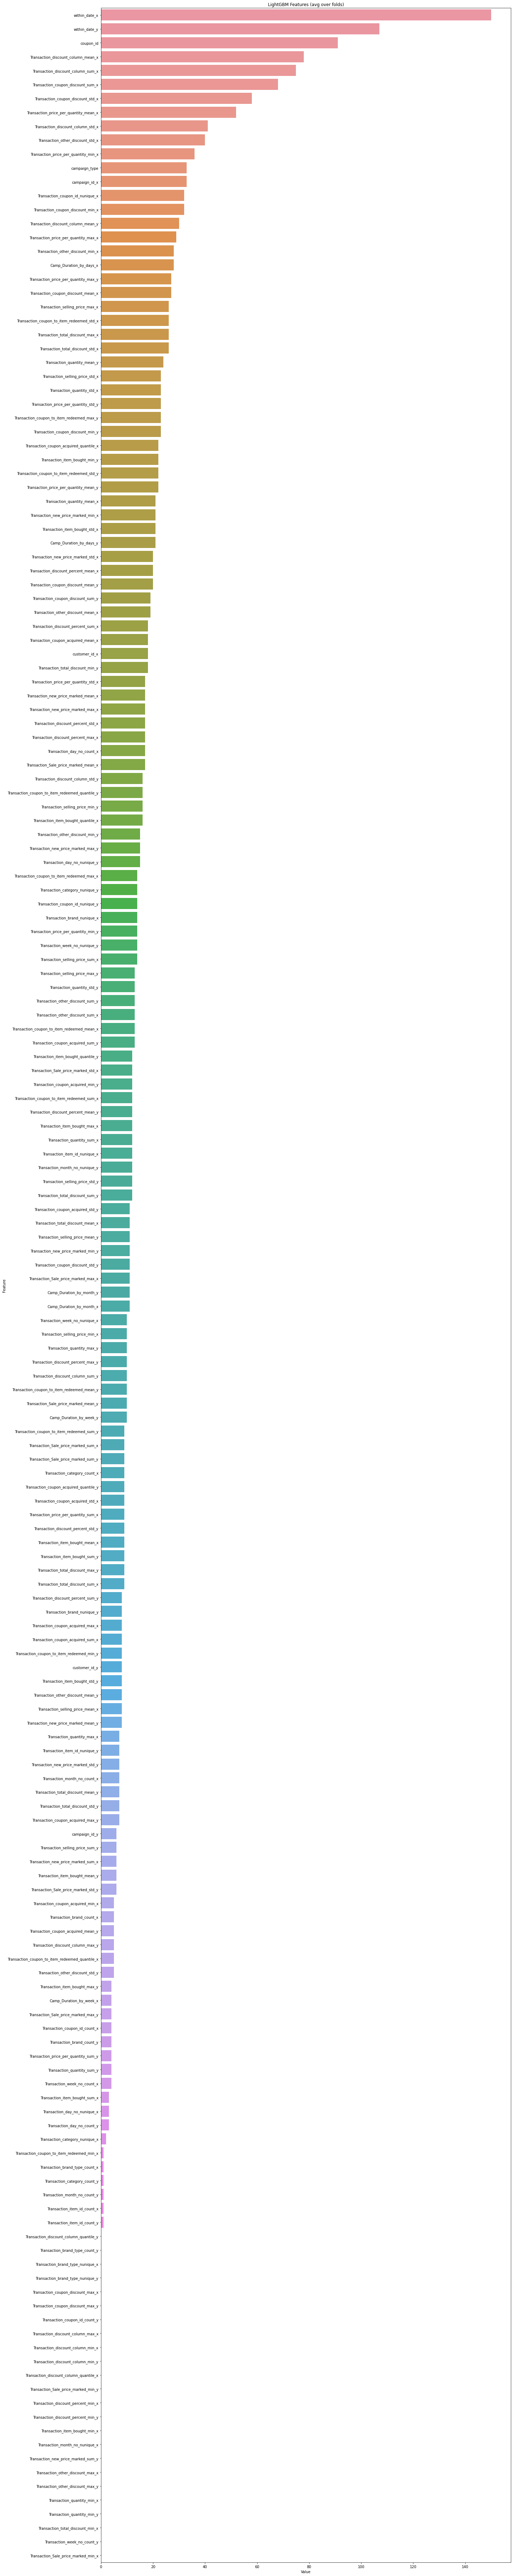

<Figure size 432x288 with 0 Axes>

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(m.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 100))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

ROC Area Under Curve is : 0.9933726067746685


Text(0.5, 0, 'False Positive Rate')

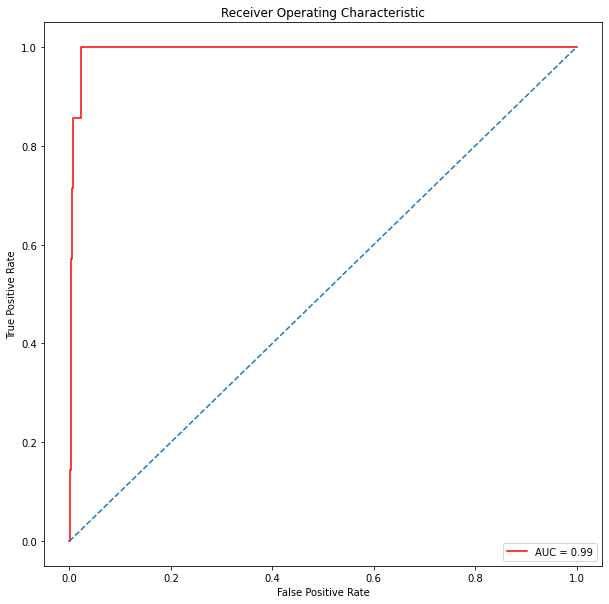

In [107]:
# Making Confusion Matrix
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_test,preds))
# ROC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Area Under Curve is :", roc_auc)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')